# Plot Lineage Trees

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
matplotlib.rc("figure", figsize=(10,5))
import pathlib

from plot_lineage_tree import lin_tree

## Plot lineage Caulobacter

In [2]:
#specify data directory
root_dir = pathlib.Path(pathlib.Path.home(), 'switchdrive', 'Biozentrum', 'Andreas') 
data_dir = root_dir / 'data_files_individual_colonies' / 'csv_files_Cc' 
im_dir = root_dir / 'lineage_trees_Cc'

time_int = 5 #time interval in minutes
cdg_channel = 'fluo1'

#provide dictionary with movie name and colony ID's
data_list = [{'df':'AKS1089_TL01_07.csv', 'col':[0]},
           {'df':'AKS1089_TL01_07.csv', 'col':[2,3]},
           {'df':'AKS1091_TL01_23.csv', 'col':[33]},
           {'df':'AKS1092_TL01_27.csv', 'col':[49]},
           {'df':'AKS1092_TL01_28.csv', 'col':[93]},
           {'df':'AKS1092_TL01_29.csv', 'col':[89]}]
           

In [3]:
maxT = 0
cdg_int = 50
t_offset = 25

cdg = np.array([])

for d in data_list:
    df = pd.read_csv(data_dir / d['df'])
    maxT = max(maxT, df['frames'].max()*time_int)
    cdg = np.concatenate((cdg, df[cdg_channel]))


cdg_range = tuple(np.quantile(cdg, [0.05, 0.95]))
maxT += t_offset

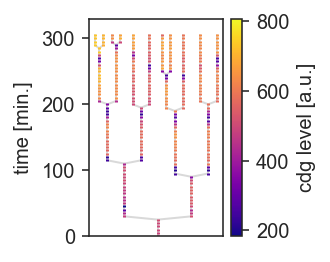

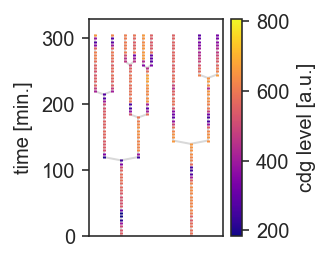

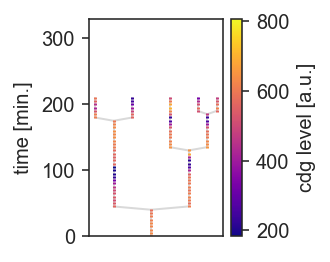

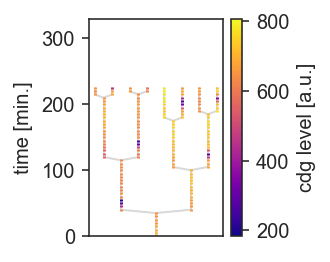

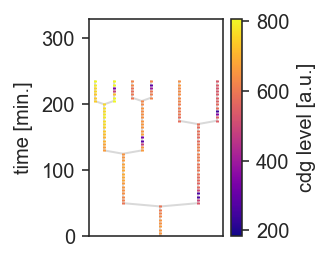

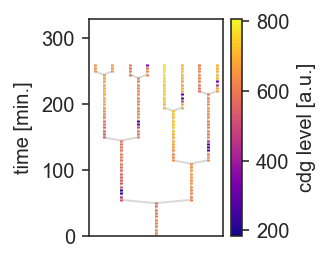

In [5]:
for d in data_list:
    df_name = d['df']
    col_id = d['col']

    df = pd.read_csv(data_dir / df_name)
    df_col = df.loc[df['id_colony'].isin(col_id)]

    lt = lin_tree(df_col, cdg_channel, frame_int=time_int)  
    
    fig, axs = lt.plot(cb_label='cdg level [a.u.]', 
                    cb_lim=cdg_range,
                    marker_size=1, 
                    marker_type='|', 
                    fig_size=(1.5,2))
    
    axs.set_ylim([0, maxT])
    
    save_name = im_dir / df_name.replace('.csv','_c%i.svg' % col_id[0])
    fig.savefig(save_name)
    #plt.close()